**Codveda Internship Level 1(Basic) Task 3: Exploratory DataAnalysis (EDA)**

##### For this task, I'll be making use of a covid-19 dataset

#### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Data Collection 

In [2]:
# Loading the dataset into a Pandas dataframe
malaria_dataset = pd.read_csv("estimated_numbers.csv")

In [3]:
# Getting the first five rows of the dataset
malaria_dataset.head()

,Country,Year,No. of cases,No. of deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,WHO Region
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean
1,Algeria,2017,0,0,0,NaN,NaN,0,NaN,NaN,Africa
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa
3,Argentina,2017,0,0,0,NaN,NaN,0,NaN,NaN,Americas
4,Armenia,2017,0,0,0,NaN,NaN,0,NaN,NaN,Europe


In [4]:
# Getting the number of rows and columns in the dataset
malaria_dataset.shape

(856, 11)

In [5]:
# Getting some basic info about the dataset
malaria_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               856 non-null    object 
 1   Year                  856 non-null    int64  
 2   No. of cases          856 non-null    object 
 3   No. of deaths         856 non-null    object 
 4   No. of cases_median   856 non-null    int64  
 5   No. of cases_min      544 non-null    float64
 6   No. of cases_max      544 non-null    float64
 7   No. of deaths_median  856 non-null    int64  
 8   No. of deaths_min     524 non-null    float64
 9   No. of deaths_max     524 non-null    float64
 10  WHO Region            856 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 73.7+ KB


In [6]:
# Checking for missing values
malaria_dataset.isnull().sum()

Country                   0
Year                      0
No. of cases              0
No. of deaths             0
No. of cases_median       0
No. of cases_min        312
No. of cases_max        312
No. of deaths_median      0
No. of deaths_min       332
No. of deaths_max       332
WHO Region                0
dtype: int64

In [7]:
# # Handling missing values
# numeric_col = malaria_dataset.select_dtypes(include=["number"]).columns
# for col in numeric_col:
#     if malaria_dataset[col].isnull().sum() > 0:
#         malaria_dataset[col].fillna(malaria_dataset[col].median())

In [8]:
# Dropping the missing values
malaria_dataset = malaria_dataset.dropna()

In [9]:
malaria_dataset.head()

,Country,Year,No. of cases,No. of deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,WHO Region
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa
6,Bangladesh,2017,32924[30000-36000],76[3-130],32924,30000.0,36000.0,76,3.0,130.0,South-East Asia
8,Benin,2017,4111699[2774000-6552000],7328[5740-8920],4111699,2774000.0,6552000.0,7328,5740.0,8920.0,Africa
10,Bolivia (Plurinational State of),2017,6512[4900-8300],2[0-4],6512,4900.0,8300.0,2,0.0,4.0,Americas


In [10]:
malaria_dataset.shape

(509, 11)

In [11]:
malaria_dataset.isnull().sum()

Country                 0
Year                    0
No. of cases            0
No. of deaths           0
No. of cases_median     0
No. of cases_min        0
No. of cases_max        0
No. of deaths_median    0
No. of deaths_min       0
No. of deaths_max       0
WHO Region              0
dtype: int64

In [12]:
# Dropping unnecessary columns 
malaria_dataset = malaria_dataset.drop(columns=["No. of cases", "No. of deaths"], axis=1)

#### Data Analysis and Visualization

In [13]:
malaria_dataset.head()

,Country,Year,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,WHO Region
0,Afghanistan,2017,630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean
2,Angola,2017,4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa
6,Bangladesh,2017,32924,30000.0,36000.0,76,3.0,130.0,South-East Asia
8,Benin,2017,4111699,2774000.0,6552000.0,7328,5740.0,8920.0,Africa
10,Bolivia (Plurinational State of),2017,6512,4900.0,8300.0,2,0.0,4.0,Americas


In [14]:
# Statistical measures of the dataset
malaria_dataset.describe()

,Year,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max
count,509.000000,5.090000e+02,5.090000e+02,5.090000e+02,509.000000,509.000000,509.000000
mean,2013.485265,3.494120e+06,2.300782e+06,5.244958e+06,7922.620825,5784.671906,10447.172888
std,2.291348,7.976160e+06,5.538423e+06,1.132609e+07,16342.216628,12974.742257,20393.518346
min,2010.000000,3.020000e+02,2.300000e+02,4.300000e+02,0.000000,0.000000,1.000000
25%,2011.000000,7.932900e+04,4.100000e+04,1.030000e+05,119.000000,9.000000,230.000000
50%,2013.000000,1.033327e+06,5.630000e+05,1.591000e+06,2399.000000,530.000000,4250.000000
75%,2015.000000,3.594883e+06,2.292000e+06,5.852000e+06,9749.000000,6790.000000,13200.000000
max,2017.000000,6.202089e+07,4.388000e+07,8.484000e+07,146734.000000,115000.000000,179000.000000


In [15]:
# Getting the number of regions affected by malaria
malaria_dataset["WHO Region"].value_counts()

Africa                   296
Americas                  72
Western Pacific           56
South-East Asia           45
Eastern Mediterranean     40
Name: WHO Region, dtype: int64

#### Correlation

In [16]:
# Define correlation
correlation_col = malaria_dataset[["No. of cases_median", "No. of cases_min", "No. of cases_max", "No. of deaths_median", "No. of deaths_min", "No. of deaths_max"]]
correlation = correlation_col.corr()
correlation

,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max
No. of cases_median,1.000000,0.996458,0.991130,0.967469,0.935876,0.957786
No. of cases_min,0.996458,1.000000,0.977674,0.965242,0.935296,0.945872
No. of cases_max,0.991130,0.977674,1.000000,0.957436,0.920103,0.969016
No. of deaths_median,0.967469,0.965242,0.957436,1.000000,0.983527,0.977635
No. of deaths_min,0.935876,0.935296,0.920103,0.983527,1.000000,0.932202
No. of deaths_max,0.957786,0.945872,0.969016,0.977635,0.932202,1.000000


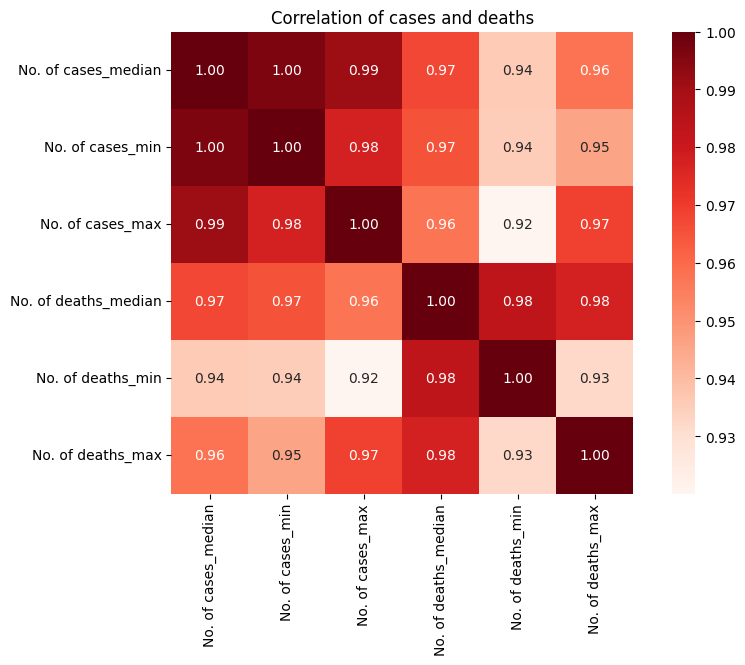

In [17]:
# Constructing a heatmap
plt.figure(figsize=(10, 6))

sns.heatmap(correlation, cbar=True, annot=True, square=True, fmt=".2f", cmap="Reds")
plt.title("Correlation of cases and deaths")
plt.show()

In [18]:
# Removing unnecessary columns and keeping the relevant ones for better insights
malaria_dataset = malaria_dataset.drop(columns=["No. of cases_min", "No. of cases_max", "No. of deaths_min", "No. of deaths_max"])

In [19]:
malaria_dataset.rename(columns={"No. of cases_median": "No. of cases", "No. of deaths_median": "No. of deaths"}, inplace=True)

In [20]:
malaria_dataset.head()

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,630308,298,Eastern Mediterranean
2,Angola,2017,4615605,13316,Africa
6,Bangladesh,2017,32924,76,South-East Asia
8,Benin,2017,4111699,7328,Africa
10,Bolivia (Plurinational State of),2017,6512,2,Americas


In [21]:
# Number of malaria cases based on WHO Region
px.pie(malaria_dataset, values="No. of cases", names="WHO Region", title="No. of malaria cases in each region")

In [22]:
# Grouping the number of malaria cases based on WHO Region
regional_cases = malaria_dataset.groupby("WHO Region")["No. of cases"].sum().reset_index()
regional_cases

,WHO Region,No. of cases
0,Africa,1586862179
1,Americas,10017434
2,Eastern Mediterranean,34399288
3,South-East Asia,132520640
4,Western Pacific,14707459


In [23]:
# Distribution of malaria cases based on WHO Region
px.bar(regional_cases, x="WHO Region", y="No. of cases", color="WHO Region", title="Cases by WHO Region", labels={"No. of cases": "Number of Cases", "WHO Region": "WHO Region"})

In [24]:
# Grouping the number of deaths in each region
regional_deaths = malaria_dataset.groupby("WHO Region")["No. of deaths"].sum().reset_index()
regional_deaths

,WHO Region,No. of deaths
0,Africa,3703935
1,Americas,18707
2,Eastern Mediterranean,63042
3,South-East Asia,217111
4,Western Pacific,29819


In [25]:
# Distribution of deaths in each region
px.bar(regional_deaths, x="No. of deaths", y="WHO Region", color="WHO Region", title="Number of deaths in each region", labels={"No. of deaths": "Number of deaths", "WHO Region": "WHO Region"})

#### Trend Analysis

In [26]:
# Grouping the number of cases and deaths based on year
cases_trend = malaria_dataset.groupby("Year")[["No. of cases", "No. of deaths"]].sum().reset_index()
cases_trend

,Year,No. of cases,No. of deaths
0,2010,238085116,606651
1,2011,228594449,560650
2,2012,225934368,528432
3,2013,220509906,499960
4,2014,216706571,482963
5,2015,213812396,468555
6,2016,216292875,450646
7,2017,218571319,434757


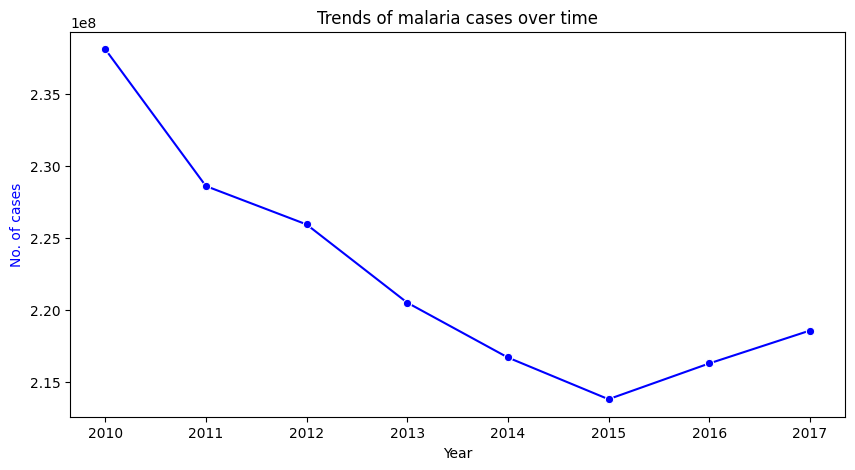

In [27]:
plt.figure(figsize=(10, 5))
sns.lineplot(cases_trend, x="Year", y="No. of cases", color="blue", marker="o")
plt.title("Trends of malaria cases over time")
plt.ylabel("No. of cases", color="blue")
plt.xlabel("Year")
plt.savefig("Trend Analysis for malaria cases.jpg", format="jpeg", dpi=300)
plt.show()

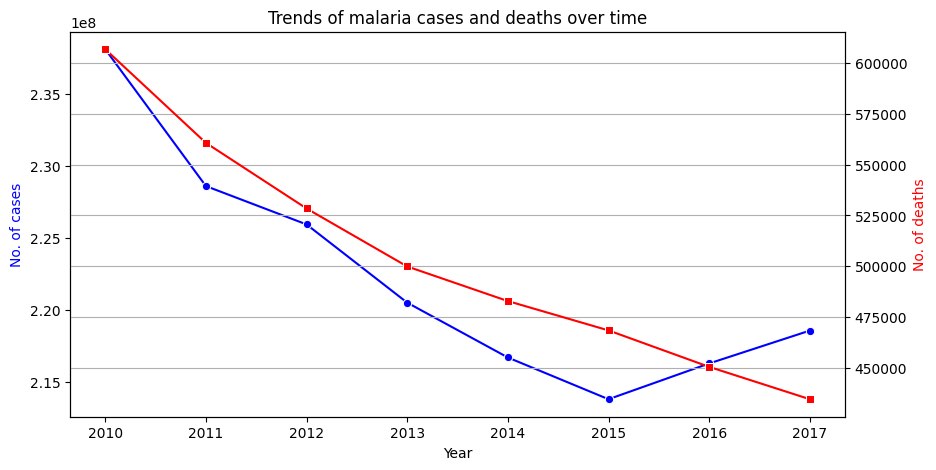

In [28]:
# Trend of cases and deaths over time
plt.figure(figsize=(10, 5))

sns.lineplot(cases_trend, x="Year", y="No. of cases", color="blue", marker="o")
plt.ylabel("No. of cases", color="blue")
plt.xlabel("Year")

plt.twinx()

sns.lineplot(cases_trend, x="Year", y="No. of deaths", color="red", marker="s")
plt.ylabel("No. of deaths", color="red")

plt.title("Trends of malaria cases and deaths over time")
plt.grid(True)

plt.savefig("Trend Analysis.jpg", format="jpeg", dpi=300)
plt.show()

In [29]:
# Getting the number of countries
malaria_dataset["Country"].value_counts()

Afghanistan    8
Angola         8
Malawi         8
Mali           8
Mauritania     8
              ..
Haiti          8
Honduras       8
India          8
Indonesia      8
Timor-Leste    5
Name: Country, Length: 64, dtype: int64

In [30]:
# Grouping the number of cases and deaths based on country
country_trend = malaria_dataset.groupby("Country")[["No. of cases", "No. of deaths"]].sum().reset_index()
country_trend

,Country,No. of cases,No. of deaths
0,Afghanistan,3199109,1561
1,Angola,29835443,103272
2,Bangladesh,439538,1059
3,Benin,29050757,57446
4,Bolivia (Plurinational State of),88389,40
...,...,...,...
59,Venezuela (Bolivarian Republic of),1391294,1297
60,Viet Nam,128714,216
61,Yemen,7106752,18075
62,Zambia,24249839,57322


In [31]:
# Comparing the top 10 countries with most cases
top_10 = country_trend.nlargest(10, "No. of cases")
px.bar(top_10, x="Country", y="No. of cases", color="Country", title="Distribution of top 10 countries with most Malaria cases")

In [32]:
# Comparing the top 10 countries with most deaths
top_10 = country_trend.nlargest(10, "No. of cases")
px.bar(top_10, x="No. of deaths", y="Country", color="Country", title="Distribution of top 10 countries with most Malaria deaths")

In [33]:
# Scatter plot
px.scatter(malaria_dataset, x="No. of cases", y="No. of deaths", color="WHO Region", hover_data="Year", title="Distribution of malaria cases and deaths")